In [4]:
 -data = pd.read_csv(r'merged_audio_features_updated.csv')
data

,filename,mfcc_1_mean,mfcc_1_var,mfcc_2_mean,mfcc_2_var,mfcc_3_mean,mfcc_3_var,mfcc_4_mean,mfcc_4_var,mfcc_5_mean,...,chroma_stft_8_var,chroma_stft_9_mean,chroma_stft_9_var,chroma_stft_10_mean,chroma_stft_10_var,chroma_stft_11_mean,chroma_stft_11_var,chroma_stft_12_mean,chroma_stft_12_var,Label
0,1,-412.98703,6137.6800,117.409970,777.68964,15.090271,566.33370,13.988380,510.83566,16.438044,...,0.038448,0.576595,0.031465,0.657492,0.035462,0.703484,0.037646,0.715633,0.056100,1
1,2,-424.42200,4933.8680,119.530100,700.75446,10.603728,408.94418,16.762222,577.76990,22.910408,...,0.051329,0.600502,0.045272,0.625120,0.035223,0.683375,0.034800,0.700563,0.050900,1
2,3,-431.57397,4262.0596,118.966390,688.35000,21.516417,396.37787,14.334884,408.00443,18.115866,...,0.049015,0.594699,0.036689,0.608201,0.042954,0.628294,0.044722,0.661607,0.056423,1
3,4,-431.98120,4741.7646,115.889626,778.37634,19.890894,435.21097,11.368954,325.51846,16.652294,...,0.047990,0.608201,0.038064,0.633321,0.039062,0.629198,0.035794,0.677100,0.062509,1
4,5,-411.66745,4960.0615,120.316640,1075.39650,18.620934,411.17170,13.802200,361.81232,20.349533,...,0.046613,0.551611,0.037135,0.558108,0.044207,0.601823,0.053950,0.659278,0.073529,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,-441.85132,8467.5625,154.923870,644.24554,-8.013287,989.69464,15.822552,582.91064,26.817759,...,0.032648,0.418192,0.043334,0.451775,0.056392,0.426315,0.054536,0.417156,0.058414,2
169,170,-444.06433,8178.7500,151.417270,866.12000,-10.821497,1096.99340,12.863245,403.20306,26.157701,...,0.036728,0.306854,0.045593,0.276882,0.043017,0.275056,0.049242,0.287134,0.047969,2
170,171,-421.05255,11316.4690,135.230670,764.77940,-5.155491,970.56550,17.078873,737.23060,10.292766,...,0.044539,0.438428,0.054042,0.396071,0.042959,0.374785,0.047665,0.323068,0.038966,2
171,172,-432.52713,10184.7170,148.270260,483.29413,-31.823568,1046.21220,26.805940,789.60050,16.477793,...,0.034313,0.334841,0.044784,0.307051,0.039481,0.291094,0.037108,0.285818,0.040133,2


C:\Users\kadar_hcjxeot\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.81

Confusion Matrix:
[[21  3]
 [ 7 21]]


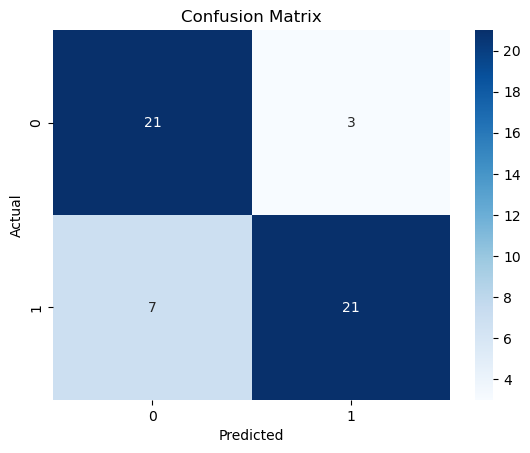


Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.88      0.81        24
           2       0.88      0.75      0.81        28

    accuracy                           0.81        52
   macro avg       0.81      0.81      0.81        52
weighted avg       0.82      0.81      0.81        52



In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Replace 'your_dataset.csv' with the path to your dataset
data = pd.read_csv(r'merged_audio_features_updated.csv')

# Split the dataset into features (X) and target (y)
# Replace 'target_column' with the name of your target column
X = data.drop('Label', axis=1)
y = data['Label']

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


Accuracy: 0.98

Confusion Matrix:
[[24  0]
 [ 1 27]]


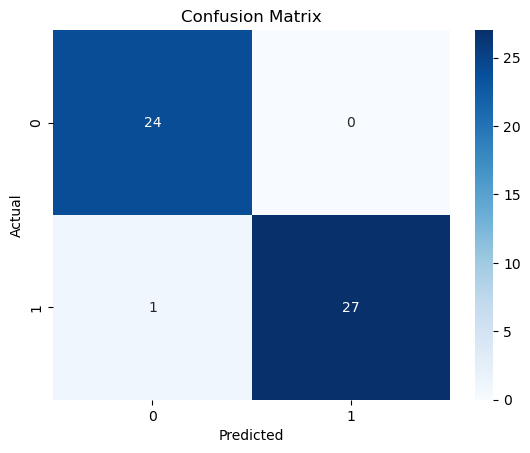


Classification Report:
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        24
           2       1.00      0.96      0.98        28

    accuracy                           0.98        52
   macro avg       0.98      0.98      0.98        52
weighted avg       0.98      0.98      0.98        52



In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Replace 'your_dataset.csv' with the path to your dataset
data = pd.read_csv(r'merged_audio_features_updated.csv')

# Split the dataset into features (X) and target (y)
# Replace 'target_column' with the name of your target column
X = data.drop('Label', axis=1)
y = data['Label']

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Random Forest model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


Found 119 images belonging to 2 classes.
Found 52 images belonging to 2 classes.
Epoch 1/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 162s 44s/step - accuracy: 0.5191 - loss: 0.7203 - val_accuracy: 0.6346 - val_loss: 0.6024
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 124s 32s/step - accuracy: 0.7584 - loss: 0.5344 - val_accuracy: 0.8462 - val_loss: 0.4942
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 125s 36s/step - accuracy: 0.8164 - loss: 0.4351 - val_accuracy: 0.7308 - val_loss: 0.4575
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 124s 33s/step - accuracy: 0.8695 - loss: 0.3879 - val_accuracy: 0.8654 - val_loss: 0.4545
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 123s 32s/step - accuracy: 0.7824 - loss: 0.4814 - val_accuracy: 0.8077 - val_loss: 0.3885
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 123s 33s/step - accuracy: 0.8697 - loss: 0.3665 - val_accuracy: 0.8077 - val_loss: 0.3768
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 124s 35s/step - accuracy: 0.8823 - loss: 0.3126 - val_accuracy: 0.8462 - val_loss: 0.3654
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1

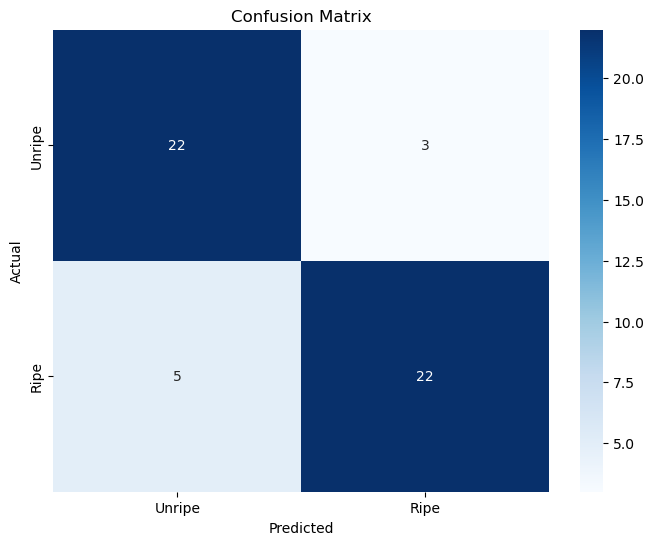

In [9]:
import os
import numpy as np
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Original dataset directory
original_dataset_dir = r"C:\Users\kadar_hcjxeot\Downloads\ripe_unripe"  # Should contain 'ripe/' and 'unripe/'

# Temporary directories for train and test splits
base_dir = "split_dataset"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Function to create train/test directories
def create_split_folders():
    for folder in [train_dir, test_dir]:
        for subfolder in ['ripe', 'unripe']:
            os.makedirs(os.path.join(folder, subfolder), exist_ok=True)

# Split dataset into train and test
def split_data():
    create_split_folders()
    for label in ['ripe', 'unripe']:
        folder_path = os.path.join(original_dataset_dir, label)
        images = os.listdir(folder_path)
        train_images, test_images = train_test_split(images, test_size=0.3, random_state=42)  # 70% train, 30% test
        for img in train_images:
            shutil.copy(os.path.join(folder_path, img), os.path.join(train_dir, label))
        for img in test_images:
            shutil.copy(os.path.join(folder_path, img), os.path.join(test_dir, label))

# Prepare dataset
split_data()

# Data Generators
train_datagen = ImageDataGenerator(rescale=1.0 / 255.0, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Load pre-trained VGG16 model + higher level layers
vgg_base = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
for layer in vgg_base.layers:
    layer.trainable = False  # Freeze the pre-trained layers

# Add custom layers on top of VGG16
x = Flatten()(vgg_base.output)
x = Dense(128, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification
model = Model(inputs=vgg_base.input, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, epochs=40, validation_data=test_data)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predict on the test data
y_pred = model.predict(test_data)
y_pred_classes = (y_pred > 0.5).astype("int32").reshape(-1)
y_true = test_data.classes

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=['Unripe', 'Ripe']))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Unripe', 'Ripe'], yticklabels=['Unripe', 'Ripe'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Found 240 images belonging to 2 classes.
Found 104 images belonging to 2 classes.


C:\Users\kadar_hcjxeot\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 83s 11s/step - accuracy: 0.5268 - loss: 0.7431 - val_accuracy: 0.5865 - val_loss: 0.6821
Epoch 2/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 83s 11s/step - accuracy: 0.6536 - loss: 0.6746 - val_accuracy: 0.5577 - val_loss: 0.7019
Epoch 3/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 77s 10s/step - accuracy: 0.6397 - loss: 0.5949 - val_accuracy: 0.6827 - val_loss: 0.6016
Epoch 4/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 90s 12s/step - accuracy: 0.6669 - loss: 0.5626 - val_accuracy: 0.6154 - val_loss: 0.5811
Epoch 5/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 80s 10s/step - accuracy: 0.6808 - loss: 0.5683 - val_accuracy: 0.6635 - val_loss: 0.5489
Epoch 6/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 75s 10s/step - accuracy: 0.7539 - loss: 0.5104 - val_accuracy: 0.6827 - val_loss: 0.5397
Epoch 7/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 74s 10s/step - accuracy: 0.7455 - loss: 0.4742 - val_accuracy: 0.6250 - val_loss: 0.5558
Epoch 8/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 74s 10s/step - accuracy: 0.8243 - loss: 0.4066 - val_accuracy: 0.6827 - val_loss: 0.5313


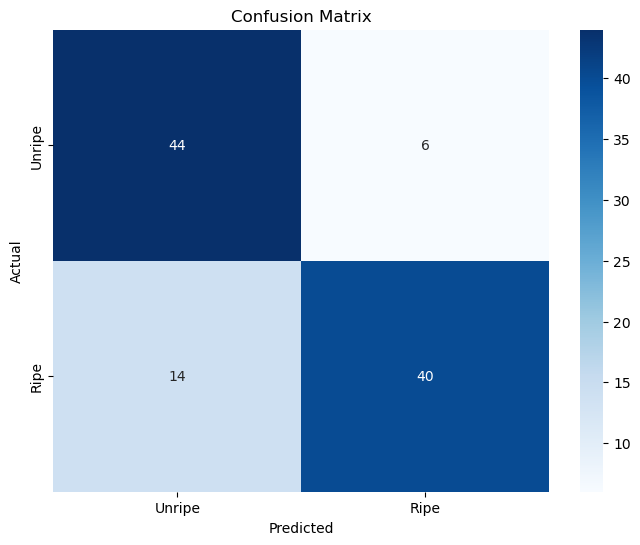

In [10]:
import os
import numpy as np
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Original dataset directory
original_dataset_dir = r"C:\Users\kadar_hcjxeot\Downloads\ripe_unripe_wav"  # Should contain 'ripe/' and 'unripe/'

# Temporary directories for train and test splits
base_dir = "split_dataset"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Function to create train/test directories
def create_split_folders():
    for folder in [train_dir, test_dir]:
        for subfolder in ['ripe', 'unripe']:
            os.makedirs(os.path.join(folder, subfolder), exist_ok=True)

# Split dataset into train and test
def split_data():
    create_split_folders()
    for label in ['ripe', 'unripe']:
        folder_path = os.path.join(original_dataset_dir, label)
        images = os.listdir(folder_path)
        train_images, test_images = train_test_split(images, test_size=0.3, random_state=42)  # 70% train, 30% test
        for img in train_images:
            shutil.copy(os.path.join(folder_path, img), os.path.join(train_dir, label))
        for img in test_images:
            shutil.copy(os.path.join(folder_path, img), os.path.join(test_dir, label))

# Prepare dataset
split_data()

# Data Generators
train_datagen = ImageDataGenerator(rescale=1.0 / 255.0, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Load pre-trained VGG16 model + higher level layers
vgg_base = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
for layer in vgg_base.layers:
    layer.trainable = False  # Freeze the pre-trained layers

# Add custom layers on top of VGG16
x = Flatten()(vgg_base.output)
x = Dense(128, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification
model = Model(inputs=vgg_base.input, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, epochs=40, validation_data=test_data)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predict on the test data
y_pred = model.predict(test_data)
y_pred_classes = (y_pred > 0.5).astype("int32").reshape(-1)
y_true = test_data.classes

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=['Unripe', 'Ripe']))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Unripe', 'Ripe'], yticklabels=['Unripe', 'Ripe'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Found 240 images belonging to 2 classes.
Found 104 images belonging to 2 classes.


C:\Users\kadar_hcjxeot\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 107s 14s/step - accuracy: 0.4843 - loss: 1.0252 - val_accuracy: 0.5000 - val_loss: 0.7433
Epoch 2/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 80s 10s/step - accuracy: 0.5475 - loss: 0.7086 - val_accuracy: 0.5481 - val_loss: 0.6771
Epoch 3/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 84s 11s/step - accuracy: 0.6804 - loss: 0.5632 - val_accuracy: 0.6442 - val_loss: 0.6518
Epoch 4/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 89s 11s/step - accuracy: 0.6018 - loss: 0.6499 - val_accuracy: 0.5962 - val_loss: 0.6108
Epoch 5/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 86s 11s/step - accuracy: 0.6715 - loss: 0.5514 - val_accuracy: 0.7019 - val_loss: 0.5546
Epoch 6/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 86s 10s/step - accuracy: 0.7534 - loss: 0.5246 - val_accuracy: 0.7500 - val_loss: 0.5336
Epoch 7/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 81s 10s/step - accuracy: 0.6500 - loss: 0.5604 - val_accuracy: 0.6442 - val_loss: 0.5318
Epoch 8/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 82s 11s/step - accuracy: 0.7878 - loss: 0.4816 - val_accuracy: 0.7404 - val_loss: 0.5002

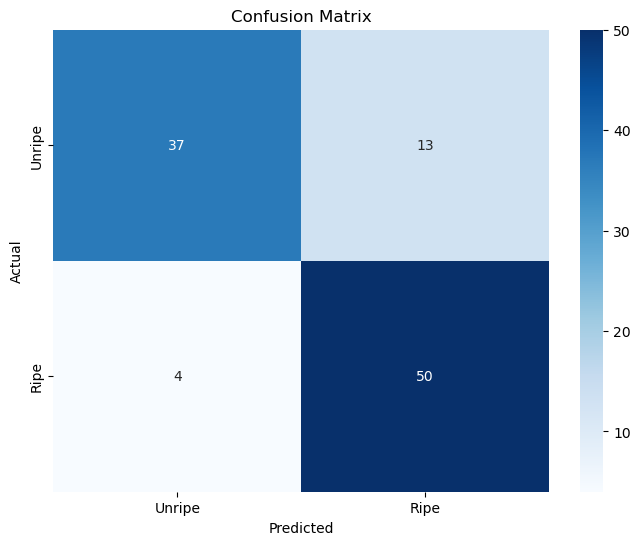

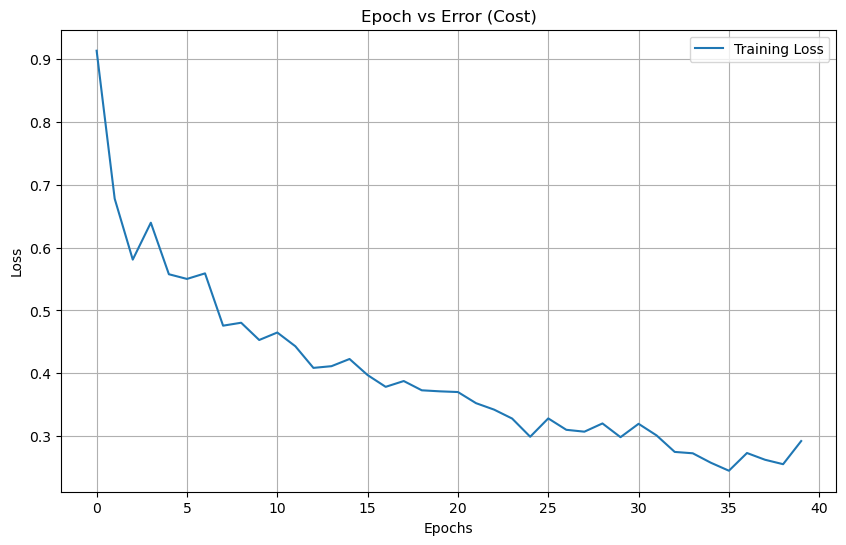

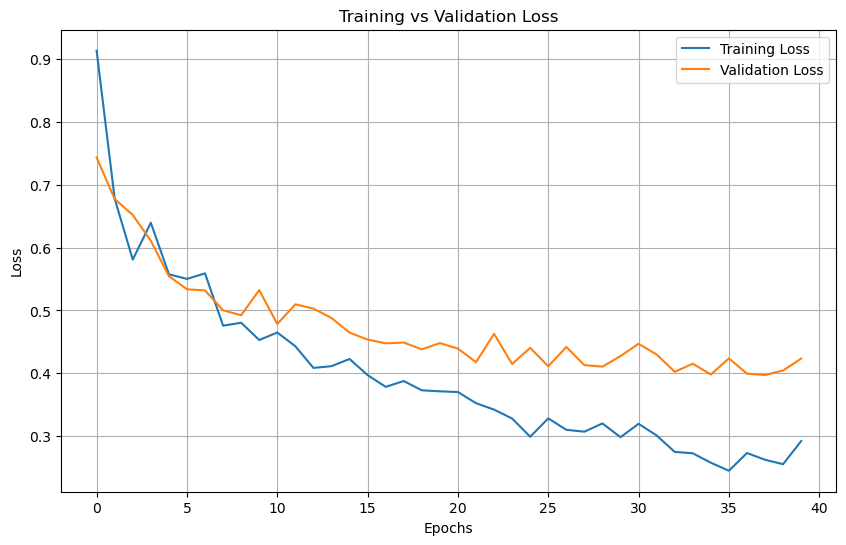

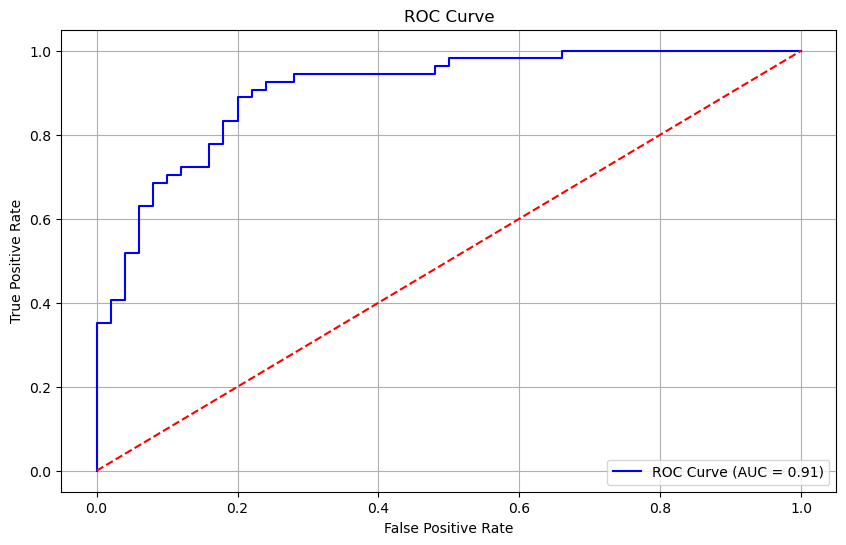

In [2]:
import os
import numpy as np
import shutil
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt

# Original dataset directory
original_dataset_dir = r"C:\Users\kadar_hcjxeot\Downloads\ripe_unripe_wav"

# Temporary directories for train and test splits
base_dir = "split_dataset"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Function to create train/test directories
def create_split_folders():
    for folder in [train_dir, test_dir]:
        for subfolder in ['ripe', 'unripe']:
            os.makedirs(os.path.join(folder, subfolder), exist_ok=True)

# Split dataset into train and test
def split_data():
    create_split_folders()
    for label in ['ripe', 'unripe']:
        folder_path = os.path.join(original_dataset_dir, label)
        images = os.listdir(folder_path)
        train_images, test_images = train_test_split(images, test_size=0.3, random_state=42)  # 70% train, 30% test
        for img in train_images:
            shutil.copy(os.path.join(folder_path, img), os.path.join(train_dir, label))
        for img in test_images:
            shutil.copy(os.path.join(folder_path, img), os.path.join(test_dir, label))

# Prepare dataset
split_data()

# Data Generators
train_datagen = ImageDataGenerator(rescale=1.0 / 255.0, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Test Data Generator (No Augmentation)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)


train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Load pre-trained VGG16 model + higher level layers
vgg_base = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
for layer in vgg_base.layers:
    layer.trainable = False  # Freeze the pre-trained layers

# Add custom layers on top of VGG16
x = Flatten()(vgg_base.output)
x = Dense(128, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification
model = Model(inputs=vgg_base.input, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, epochs=40, validation_data=test_data)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predict on the test data
y_pred = model.predict(test_data)
y_pred_classes = (y_pred > 0.5).astype("int32").reshape(-1)
y_true = test_data.classes

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=['Unripe', 'Ripe']))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Unripe', 'Ripe'], yticklabels=['Unripe', 'Ripe'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot Epoch vs Error (Cost)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epoch vs Error (Cost)')
plt.legend()
plt.grid()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid()
plt.show()

# Plot ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Found 240 images belonging to 2 classes.
Found 104 images belonging to 2 classes.


C:\Users\kadar_hcjxeot\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 164s 21s/step - accuracy: 0.4723 - loss: 0.8883 - val_accuracy: 0.5962 - val_loss: 0.6845
Epoch 2/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 145s 18s/step - accuracy: 0.5965 - loss: 0.6825 - val_accuracy: 0.6250 - val_loss: 0.6323
Epoch 3/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 145s 18s/step - accuracy: 0.6643 - loss: 0.6167 - val_accuracy: 0.6442 - val_loss: 0.6058
Epoch 4/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 145s 18s/step - accuracy: 0.6575 - loss: 0.5960 - val_accuracy: 0.6827 - val_loss: 0.5829
Epoch 5/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 145s 18s/step - accuracy: 0.7087 - loss: 0.5371 - val_accuracy: 0.6731 - val_loss: 0.5704
Epoch 6/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 145s 18s/step - accuracy: 0.7676 - loss: 0.5129 - val_accuracy: 0.6538 - val_loss: 0.5605
Epoch 7/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 145s 18s/step - accuracy: 0.7762 - loss: 0.4772 - val_accuracy: 0.7596 - val_loss: 0.5485
Epoch 8/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 145s 18s/step - accuracy: 0.7672 - loss: 0.4802 - val_accuracy: 0.7596 - val_loss:

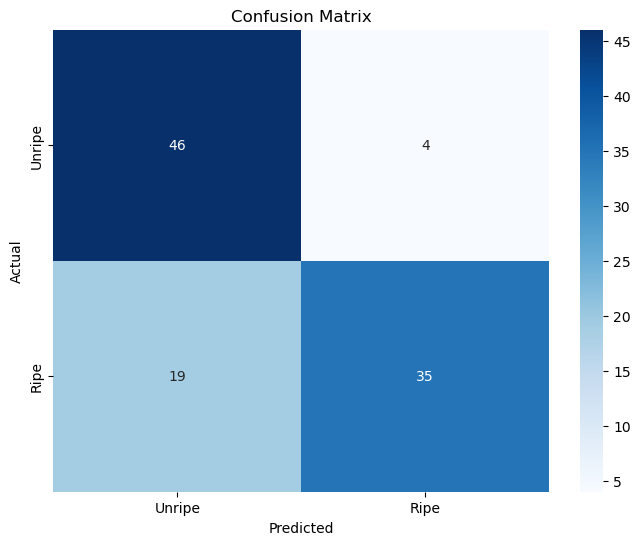

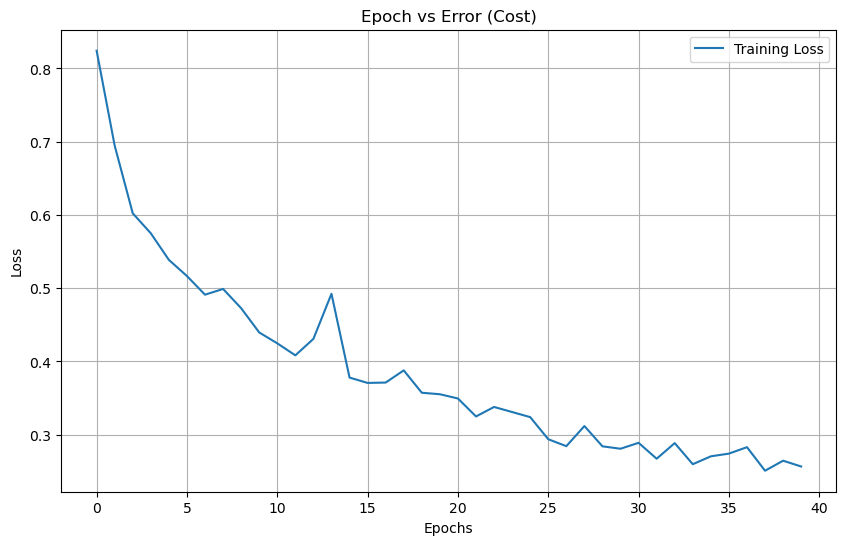

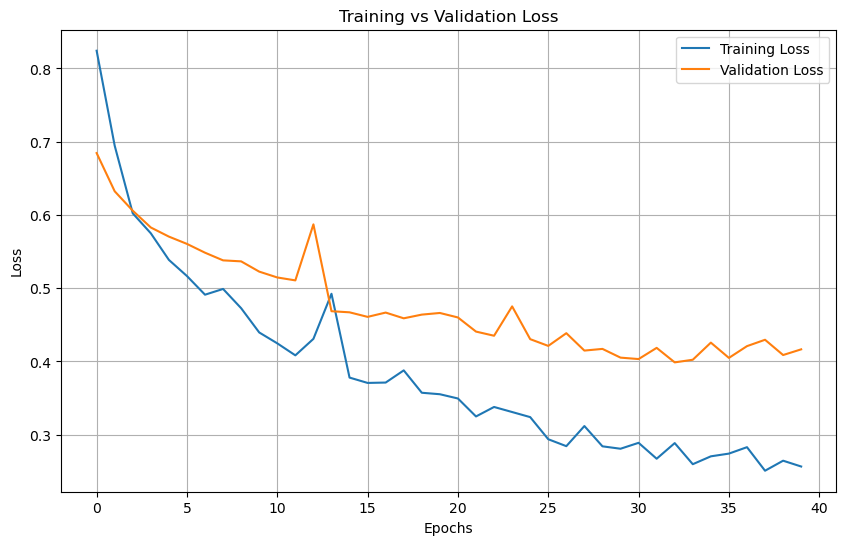

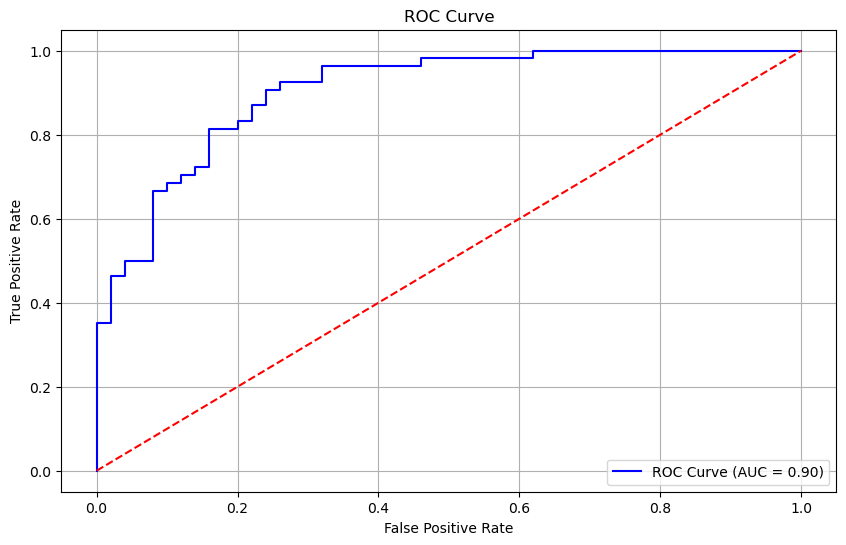

In [1]:
import os
import numpy as np
import shutil
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt

# Original dataset directory
original_dataset_dir = r"C:\Users\kadar_hcjxeot\Downloads\ripe_unripe"

# Temporary directories for train and test splits
base_dir = "split_dataset"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Function to create train/test directories
def create_split_folders():
    for folder in [train_dir, test_dir]:
        for subfolder in ['ripe', 'unripe']:
            os.makedirs(os.path.join(folder, subfolder), exist_ok=True)

# Split dataset into train and test
def split_data():
    create_split_folders()
    for label in ['ripe', 'unripe']:
        folder_path = os.path.join(original_dataset_dir, label)
        images = os.listdir(folder_path)
        train_images, test_images = train_test_split(images, test_size=0.3, random_state=42)  # 70% train, 30% test
        for img in train_images:
            shutil.copy(os.path.join(folder_path, img), os.path.join(train_dir, label))
        for img in test_images:
            shutil.copy(os.path.join(folder_path, img), os.path.join(test_dir, label))

# Prepare dataset
split_data()

# Data Generators
train_datagen = ImageDataGenerator(rescale=1.0 / 255.0, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Test Data Generator (No Augmentation)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)


train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Load pre-trained VGG16 model + higher level layers
vgg_base = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
for layer in vgg_base.layers:
    layer.trainable = False  # Freeze the pre-trained layers

# Add custom layers on top of VGG16
x = Flatten()(vgg_base.output)
x = Dense(128, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification
model = Model(inputs=vgg_base.input, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, epochs=40, validation_data=test_data)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predict on the test data
y_pred = model.predict(test_data)
y_pred_classes = (y_pred > 0.5).astype("int32").reshape(-1)
y_true = test_data.classes

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=['Unripe', 'Ripe']))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Unripe', 'Ripe'], yticklabels=['Unripe', 'Ripe'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot Epoch vs Error (Cost)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epoch vs Error (Cost)')
plt.legend()
plt.grid()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid()
plt.show()

# Plot ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
